# Проект для "Викишоп" с BERT

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Цель-исследования:" data-toc-modified-id="Цель-исследования:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель исследования:</a></span></li><li><span><a href="#Задачи-исследования:" data-toc-modified-id="Задачи-исследования:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Задачи исследования:</a></span></li></ul></li><li><span><a href="#Предисловие" data-toc-modified-id="Предисловие-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предисловие</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#BERT" data-toc-modified-id="BERT-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>BERT</a></span><ul class="toc-item"><li><span><a href="#Подготовка-входных-данных" data-toc-modified-id="Подготовка-входных-данных-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Подготовка входных данных</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Catboost</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>TF-IDF</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

## Описание проекта

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

### Цель исследования:

Построить модель машинного обучения для решения задачи бинарной классификации со значением метрики качества F1 не меньше 0.75.

### Задачи исследования:

1. Загрузить и подготовить данные.
2. Обучить разные модели.
3. Сделайть выводы.



## Предисловие

Работы выполнялась в Google Colab с использованием GPU.

## Подготовка данных

Импортируем необходимые для работы библиотеки.

In [1]:
!pip install pytorch-transformers
!pip install bert-tensorflow
!pip install tensorflow
!pip install catboost

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,make_scorer,accuracy_score
from sklearn.svm import SVC,LinearSVC
from catboost import Pool, CatBoostClassifier

from tqdm import notebook,tqdm, trange
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.dummy import DummyClassifier
import lightgbm
 
nltk.download('wordnet','stopwords','punkt','averaged_perceptron_tagger')
from nltk.corpus import wordnet

import time 
 
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from pytorch_transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification

from IPython.display import clear_output
import matplotlib.pyplot as plt
import io

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

     |████████████████████████████████| 176 kB 13.6 MB/s 
     |████████████████████████████████| 1.2 MB 48.5 MB/s 
     |████████████████████████████████| 880 kB 42.5 MB/s 
     |████████████████████████████████| 132 kB 52.0 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 8.7 MB 48.2 MB/s 
     |████████████████████████████████| 138 kB 47.8 MB/s 
     |████████████████████████████████| 127 kB 63.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=734c0d512c4f02e786eef83bb51693135344bad1ce50d59a8fa21c87b8d934fb
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the pack

Загрузим датасет и выведем первые строки и общую информацию.

In [2]:
df = pd.read_csv('toxic_comments.csv')

In [3]:
display(df.head(10))
display(df.info())

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


None

В датасете представлены 159571 комментарий с положительной или негативной окраской. Информация о том, является ли комментарий негативным отображается в столбце `toxic`.


Посмотрим, как соотносятся между собой эти виды комментариев.

 Соотношение классов: 
0    89.832112
1    10.167888
Name: toxic, dtype: float64


Text(0.5, 1.0, 'Количество положительных и отрицательных комментариев')

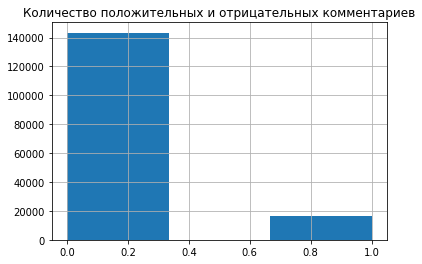

In [4]:
print('\033[1m','Соотношение классов:', '\033[0m')
print(df['toxic'].value_counts()/df['toxic'].shape[0]*100)

df['toxic'].hist(bins=3)
plt.title('Количество положительных и отрицательных комментариев')

Положительные комментарии составляют почти 90% от их общего числа. При обучении модели будем учитывать балансировку весов каждого класса.

Отформатируем комментарии - приведем текст к нижнему регистру, оставим только английские буквы и цифры.

In [4]:
df['text'] = df['text'].values.astype('U')
df['text'] = df['text'].str.lower()

text_new = []
pattern = r'[^a-zA-Z0-9]' 
for sentence in df.text:
    cleared_text = re.sub(pattern, " ", sentence)
    text_new.append(" ". join(cleared_text.split()))

df['clear_text'] = text_new
df.head() 

,text,toxic,clear_text
0,explanation\nwhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,d'aww! he matches this background colour i'm s...,0,d aww he matches this background colour i m se...
2,"hey man, i'm really not trying to edit war. it...",0,hey man i m really not trying to edit war it s...
3,"""\nmore\ni can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...
4,"you, sir, are my hero. any chance you remember...",0,you sir are my hero any chance you remember wh...


Также предварительно создадим функцию для записи результатов работы моделей.

In [5]:
results = pd.DataFrame(columns=['F1-score'])

def metrics(f1,  model_name, df=results):
    df.loc[model_name,'F1-score'] = f1
    return df

## Обучение моделей

В этом разделе рассмотрим 3 метода и сравним результаты их работы:
1. BERT
2. Catboost
3. TF-IDF 

### BERT

#### Подготовка входных данных

Чтобы `torch` мог использовать GPU, нам нужно идентифицировать и указать графический процессор в качестве используемого устройства `device`, чтобы в цикле обучения данные грузились на него.

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device == torch.device('cpu'):
    print('Используется CPU')
else:
    n_gpu = torch.cuda.device_count()
    print('Используется {} GPU'.format(torch.cuda.get_device_name(0)))

Используется CPU


Для оптимизации работы модели, выделим из датасета выборку величиной, равной `SAMPLE_SIZE`. Также проверим, чтобы после выделения выборки, соотношение классов продолжало оставаться примерно таким же, как и до этого.

In [7]:
SAMPLE_SIZE = 20000
corpus = df.sample(n=SAMPLE_SIZE,random_state=123).reset_index(drop=True)
print('\033[1m', 'Соотношение классов:','\033[0m','\n', 
      corpus.toxic.value_counts()/corpus.shape[0]*100, 
      sep='')

Соотношение классов:
0    90.235
1     9.765
Name: toxic, dtype: float64


Выделим общий и целевой признаки. Также дополнительно добавим специальные токены в начало(`CLS`) и конец (`SEP`) каждого предложения, чтобы `BERT` работал правильно.

In [9]:
sentences = corpus['text'].values 
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]

labels = corpus['toxic'].values

Выделим обучающую и тестовую выборки.

In [10]:
train_sentences, test_sentences, train_lab, test_lab = train_test_split(sentences, 
                                       labels, 
                                       test_size=0.2)

Импортируем токенизатор `BERT` для преобразования нашего текста в токены.

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sentence) for sentence in train_sentences]
print (tokenized_texts[10])

['[CLS]', '"', ',', '28', 'november', '2014', '(', 'utc', ')', 'i', 'think', 'this', 'one', 'is', 'an', 'overseas', 'filipino', 'broad', '##sh', '##eet', 'made', 'by', 'of', '##ws', 'in', 'another', 'country', '.', "'", "'", "'", "'", "'", "'", '10', ':', '44', '"', '[SEP]']


На вход `BERT` принимает определенным образом отформатированные данные. Для каждого токенизированного предложения нам нужно создать:

* **input ids:** последовательность целых чисел, идентифицирующая каждый входной токен по его порядковому номеру в словаре токенизатора BERT.
* **segment mask:** (необязательно) последовательность 1 и 0, используемая для определения того, состоит ли входной текст из одного или двух предложений. Для одного предложения это вектор, состоящий из нулей, для двух предложений - из 0 и 1.
***attention mask:** (необязательно) последовательность 1 и 0, где 1 соответствуют входным токенам и 0 для всех паддингов (padding tokens). 
* **labels:** единичное значение 1 или 0. В нашей задаче 1 отражает негативную тональность комментария, а 0 - положительную.

__________
Для BERT необходимо, чтобы наши входные комментарии были одинакового размера. Решим эту проблему, выбрав максимальную длину предложения, а затем дополняя и усекая наши входные данные, пока все комментари не будут иметь одинаковую длину.

Если предложение короче максимальной длины предложения, в конец последовательности будут добавляться 0, пока не будет достигнута максимальная длина предложения.

Если предложение длиннее максимальной длины предложения, конец последовательности будет обрезаться, а все, что не укладывается в нашу максимальную длину предложения, будет отбрасываться.

Таким образом, мы дополняем и обрезаем наши последовательности так, чтобы все они имели длину MAX_LEN.

`post` означает, что мы хотим дополнить и обрезать данные в конце последовательности, а не в ее начале. 

`pad_sequences` — это служебная функция, которую мы импортируем из Keras для обработки списков Python.


In [12]:
MAX_LEN = 160
BATCH_SIZE = 32

input_ids = [tokenizer.convert_tokens_to_ids(x[:160]) for x in tokenized_texts]
input_ids = pad_sequences(
    input_ids,
    maxlen=MAX_LEN, 
    dtype="long",
    truncating="post",
    padding="post"
)
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]

Делим данные на обучающую и валидационную выборки.

In [13]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(
    input_ids, train_lab, 
    random_state=123,
    test_size=0.1
)

train_masks, validation_masks, _, _ = train_test_split(
    attention_masks,
    input_ids,
    random_state=123,
    test_size=0.1
)

Преобразуем данные в torch тензоры.

In [14]:
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)

In [15]:
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

Для более эффективного использования памяти во время тренировки модели используем `DataLoader`. Данные по батчам будем разбивать произвольно с помощью RandomSampler. 

In [16]:
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(
    train_data,
    sampler=RandomSampler(train_data),
    batch_size=BATCH_SIZE 
)
validation_data = TensorDataset(validation_inputs, 
                                validation_masks, validation_labels)
validation_dataloader = DataLoader(
    validation_data,
    sampler=SequentialSampler(validation_data),
    batch_size=BATCH_SIZE 
)

#### Обучение

Используем готовую модификацию BERT для классификации из `pytorch-transformers` с добавленным линейным слоем для классификации - `BertForSequenceClassification`.

In [17]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=2)  

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

Для обучения сети создим функцию ошибки (то, что следует минимизировать) и оптимизатор (который будет минимизировать ошибку). Оптимизатору передадим параметры модели. 

На каждой итерации из обучающих примеров формируется массив батчей, рассчитываются предсказания и вычисляется ошибка `loss` (из сравнения выхода модели с "правильными" значениями).

На вычислительном графе ошибки метод `loss.backward()` даёт градиенты параметров модели, при помощи которых оптимизатор `optimizer` в методе `step()` получает новые значения параметров.

In [18]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters,lr=3e-5)

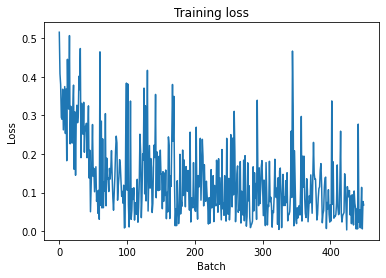

Loss на обучающей выборке: 0.13207
Процент правильных предсказаний на валидационной выборке: 95.69%


In [19]:
# loss сохраняется во время обучения
# и отображается в виде графика
train_loss_set = []
train_loss = 0


# обучение
model.train()

for step, batch in enumerate(train_dataloader):
    # добавляем батч для вычисления на GPU
    batch = tuple(t.to(device) for t in batch)
    # распаковываем данные из dataloader
    b_input_ids, b_input_mask, b_labels = batch
    b_input_ids = torch. tensor(b_input_ids). to (torch. int64)
    # если не сделать .zero_grad(), градиенты будут накапливаться
    optimizer.zero_grad()
     
     # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss[0].item())  
    
    # Backward pass
    loss[0].backward()
    
    # обновляем параметры и делаем шаг используя посчитанные градиенты
    optimizer.step()

    # обновляем loss
    train_loss += loss[0].item()
    
    # рисуем график
    clear_output(True)
    plt.plot(train_loss_set)
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.show()
    
print("Loss на обучающей выборке: {0:.5f}".format(train_loss / len(train_dataloader)))


# Валидация
model.eval()

valid_preds, valid_labels = [], []

for batch in validation_dataloader:   
    # добавляем батч для вычисления на GPU
    batch = tuple(t.to(device) for t in batch)
    
    # распаковываем данные из dataloader
    b_input_ids, b_input_mask, b_labels = batch
    b_input_ids = torch. tensor(b_input_ids). to (torch. int64)

    # при использовании .no_grad() модель не будет считать и хранить градиенты
    with torch.no_grad():
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # перемещаем logits и метки классов на CPU для дальнейшей работы
    logits = logits[0].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    batch_preds = np.argmax(logits, axis=1)
    batch_labels = np.array(label_ids)     
    valid_preds.extend(batch_preds)
    valid_labels.extend(batch_labels)
print("Процент правильных предсказаний на валидационной выборке: {0:.2f}%".format(
    accuracy_score(valid_labels, valid_preds) * 100
))


Также определим метрику F1 для валидационного набора данных.

In [20]:
print("f1_score для валидационного набора: {0:.2f}%".format(
    f1_score(valid_labels, valid_preds)))

f1_score для валидационного набора: 0.75%


#### Тестирование

Повторим процедуру подготовки данных для тестового набора.

In [21]:
tokenized_texts = [tokenizer.tokenize(sent) for sent in test_sentences]
input_ids = [tokenizer.convert_tokens_to_ids(x[:MAX_LEN]) for x in tokenized_texts]

input_ids = pad_sequences(
    input_ids,
    maxlen=MAX_LEN,
    dtype="long",
    truncating="post",
    padding="post"
)

In [22]:
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(test_lab)

prediction_data = TensorDataset(
    prediction_inputs,
    prediction_masks,
    prediction_labels
)

prediction_dataloader = DataLoader(
    prediction_data, 
    sampler=SequentialSampler(prediction_data),
    batch_size=BATCH_SIZE
)

Рассчитаем предсказания для тестовых данных.

In [23]:
model.eval()
test_preds, test_labels = [], []

for batch in prediction_dataloader:
    # добавляем батч для вычисления на GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Распаковываем данные из dataloader
    b_input_ids, b_input_mask, b_labels = batch
    b_input_ids = torch. tensor(b_input_ids). to (torch. int64)
    # При использовании .no_grad() модель не будет считать и хранить градиенты.
    # Это ускорит процесс предсказания меток для тестовых данных.
    with torch.no_grad():
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # Перемещаем logits и метки классов на CPU для дальнейшей работы
    logits = logits[0].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Сохраняем предсказанные классы и ground truth
    batch_preds = np.argmax(logits, axis=1)
    batch_labels = np.array(label_ids)  
    test_preds.extend(batch_preds)
    test_labels.extend(batch_labels)

acc_score = accuracy_score(test_labels, test_preds)
print('Процент правильных предсказаний на отложенной выборке составил: {0:.2f}%'.format(
    acc_score*100
))

Процент правильных предсказаний на отложенной выборке составил: 96.92%


Определим метрику F1 и запишем результаты в таблицу.

In [24]:
bert_f1 = f1_score(test_labels, test_preds)

metrics(bert_f1, 'BERT')

,F1-score
BERT,0.830812


Необходимое значение метрики F1 было достигнуто (0.75) и составило 0.83. Попробуем вместо этой нейронной сети попробовать использовать другие более простые методы для того, чтобы убедиться в необходимости применения BERT в нашем случае.

### Catboost

Попробуем выполнить ту же задачу с помощью Catboost и оценить, насколько качество хорошее по сравнению с другими методами.

#### Подготовка данных

Для начала подготовим входные данные: лемматизируем и токенизируем текст, добавим pos-теги и удалим стоп-слова.

In [12]:
# инициализация Wordnet Lemmatizer
L = WordNetLemmatizer()

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# функция сопоставляет POS-теги NLTK с форматом, принятым лемматизатором wordnet
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
 
    return tag_dict.get(tag, wordnet.NOUN)

In [15]:
#  функция выполняет токенизациию и лемматизацию массива текстов c учетом pos_tag и удалением стоп-слов
def get_word_text(corpus):
    corpus_new = []
    for sentence in corpus:
        corpus_new.append(' '.join([L.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if not w in stopwords.words('english')]))
    return corpus_new

In [19]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
 
corpus['lemma_text_no_sw'] = get_word_text(corpus['clear_text'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Теперь выполним лемматизацию корпуса c учетом `pos_tag`.

In [20]:
train_corpus,test_corpus = train_test_split(corpus, test_size=0.2, random_state =0,stratify = corpus['toxic'])

text_features = ['lemma_text_no_sw'] 

target = 'toxic'

#### Обучение

В процессе обучения модели будем производить токенизацию, создавать словари и подсчитывать признаки через `text_processing`.
В ходе добавления словарей также будут создаваться n-граммы.

In [31]:
cat = CatBoostClassifier( 
    text_features=text_features,
    verbose=50,
    loss_function='Logloss',
    eval_metric='F1',
    task_type="GPU",
    iterations=1000,
    learning_rate=0.1,
    random_seed = 0,
    auto_class_weights = 'Balanced',
    text_processing = {
        "tokenizers" : [{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "delimiter" : " "
        }],

        "dictionaries" : [{
            "dictionary_id" : "BiGram",
            "token_level_type": "Letter",
            "max_dictionary_size" : "150000",
            "occurrence_lower_bound" : "1",
            "gram_order" : "2"
        },{
            "dictionary_id" : "Trigram",
            "max_dictionary_size" : "150000",
            "token_level_type": "Letter",
            "occurrence_lower_bound" : "1",
            "gram_order" : "3"
        },{
            "dictionary_id" : "Fourgram",
            "max_dictionary_size" : "150000",
            "token_level_type": "Letter",
            "occurrence_lower_bound" : "1",
            "gram_order" : "4"
        },{
            "dictionary_id" : "Fivegram",
            "max_dictionary_size" : "150000",
            "token_level_type": "Letter",
            "occurrence_lower_bound" : "1",
            "gram_order" : "5"
        },{
            "dictionary_id" : "Sixgram",
            "max_dictionary_size" : "150000",
            "token_level_type": "Letter",
            "occurrence_lower_bound" : "1",
            "gram_order" : "6"
        #},{
        #    "dictionary_id" : "Sevengram",
        #    "max_dictionary_size" : "150000",
        #    "token_level_type": "Letter",
        #    "occurrence_lower_bound" : "1",
        #   "gram_order" : "7"
        }
        ],

        "feature_processing" : {
            "default" : [
                    {
                    "dictionaries_names" : ["BiGram", "Trigram", "Fourgram", "Fivegram", "Sixgram"],#,"Sevengram"],
                    "feature_calcers" : ["BoW"],
                    "tokenizers_names" : ["Space"]
                },
                    {
                "dictionaries_names" : ["BiGram", "Trigram", "Fourgram", "Fivegram", "Sixgram"],#,"Sevengram"],
                "feature_calcers" : ["NaiveBayes"],
                "tokenizers_names" : ["Space"]
            },{
                "dictionaries_names" : [ "BiGram", "Trigram", "Fourgram", "Fivegram", "Sixgram"],#,"Sevengram"],
                "feature_calcers" : ["BM25"],
                "tokenizers_names" : ["Space"]
            },
            ],
        }
    }
)

Обучаем на тестовых данных.

In [32]:
cat.fit(
    train_corpus[text_features], train_corpus[target],
    eval_set=(test_corpus[text_features], test_corpus[target]),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8127289	test: 0.8313439	best: 0.8313439 (0)	total: 118ms	remaining: 1m 57s
50:	learn: 0.8656332	test: 0.8603156	best: 0.8608243 (49)	total: 4.42s	remaining: 1m 22s
100:	learn: 0.8857896	test: 0.8596474	best: 0.8613336 (83)	total: 8.56s	remaining: 1m 16s
150:	learn: 0.9022704	test: 0.8626335	best: 0.8632708 (133)	total: 12.7s	remaining: 1m 11s
200:	learn: 0.9108395	test: 0.8658574	best: 0.8658574 (200)	total: 16.6s	remaining: 1m 6s
250:	learn: 0.9214726	test: 0.8653322	best: 0.8663678 (238)	total: 20.7s	remaining: 1m 1s
300:	learn: 0.9327303	test: 0.8609224	best: 0.8685491 (254)	total: 24.9s	remaining: 57.8s
350:	learn: 0.9386704	test: 0.8611778	best: 0.8685491 (254)	total: 29.1s	remaining: 53.7s
400:	learn: 0.9457329	test: 0.8619451	best: 0.8685491 (254)	total: 33.2s	remaining: 49.6s
450:	learn: 0.9500001	test: 0.8580073	best: 0.8685491 (254)	total: 37.4s	remaining: 45.5s
500:	learn: 0.9518843	test: 0.8548479	best: 0.8685491 (254)	total: 41.6s	remaining: 41.4s
550:	learn: 0

#### Тестирование

In [33]:
cat_f1 = f1_score(cat.predict(test_corpus[text_features]),test_corpus[target])

metrics(cat_f1, 'Catboost')

,F1-score
BERT,0.830812
Catboost,0.680896


Получившийся результат получился ниже, чем в первом случае. 

Попробуем выполнить задачу, используя TF-IDF.

### TF-IDF

Используем класс `TfidfVectorizer` из библиотеки `sklearn`, чтобы вычислить TF-IDF.

In [21]:
count_tf_idf = TfidfVectorizer(stop_words = 'english') 
tf_idf = count_tf_idf.fit(train_corpus['lemma_text_no_sw'])
tf_idf_train = tf_idf.transform(train_corpus['lemma_text_no_sw'])
test_tf_idf = tf_idf.transform(test_corpus['lemma_text_no_sw'])

In [22]:
print("Размер матрицы train:", tf_idf_train.shape,"Размер матрицы test:", test_tf_idf.shape)

Размер матрицы train: (16000, 40101) Размер матрицы test: (4000, 40101)


Выделим обучающую/тестовую выборки.

In [23]:
X_train = tf_idf_train
X_test = test_tf_idf
y_train = train_corpus['toxic'].values
y_test = test_corpus['toxic'].values

Осуществим подбор параметров и обучим модель логистической регресии.

In [24]:
parameters = {'C': np.linspace(0.1, 5000, 200),'class_weight':['balanced']}
grid_search = GridSearchCV(estimator=LogisticRegression(),param_grid = parameters, n_jobs=-1,cv=5) 
grid_search.fit(X_train, y_train)
grid_search.best_params_ 

{'C': 25.225125628140702, 'class_weight': 'balanced'}

In [25]:
lr_clf_TF_IDF = LogisticRegression(**grid_search.best_params_,random_state = 0)

lr_clf_TF_IDF.fit(X_train, y_train)

LogisticRegression(C=25.225125628140702, class_weight='balanced',
                   random_state=0)

Рассчитаем необходимые метрики.

In [26]:
f1_lr_clf = f1_score(lr_clf_TF_IDF.predict(X_test),y_test)

metrics(f1_lr_clf, 'TF-IDF')


,F1-score
TF-IDF,0.743555


Результат оказался ближе к 0.75, чем Catboost, но все же чуть ниже.

Так как необходимым условием является достижение метрики F1 значения 0.75, приоритетным методом выбирается BERT.

### Вывод

Исследование проводилось в Google Colab, использовалось GPU Tesla K80.

В ходе данной работы была произведена подготовка исходных данных (текст был преобразован в строчный вид, удалены посторонние символы, токенизирован), выделена выборка для анализа величиной 20000 единиц с целью оптимизации работы моделей. Для моделей без встроенной лемматизации она производилась вручную.

Среди рассмотренных методов в качестве инструмента для поиска токсичных комментариев лучшим себя показала нейронная сеть BERT. Для нее значение метрики качества F1 составило 0.83.

В зависимости от того, какие вычислительные мощности нам доступны, можно выбрать либо более точную BERT, либо более простой метод TF-IDF.